In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("churn_data.csv")

## EDA

In [4]:
data.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27000 entries, 0 to 26999
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user                     27000 non-null  int64  
 1   churn                    27000 non-null  int64  
 2   age                      26996 non-null  float64
 3   housing                  27000 non-null  object 
 4   credit_score             18969 non-null  float64
 5   deposits                 27000 non-null  int64  
 6   withdrawal               27000 non-null  int64  
 7   purchases_partners       27000 non-null  int64  
 8   purchases                27000 non-null  int64  
 9   cc_taken                 27000 non-null  int64  
 10  cc_recommended           27000 non-null  int64  
 11  cc_disliked              27000 non-null  int64  
 12  cc_liked                 27000 non-null  int64  
 13  cc_application_begin     27000 non-null  int64  
 14  app_downloaded        

In [6]:
data.describe()

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,...,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,...,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


In [7]:
# Unique values in churn columns
data['churn'].value_counts()

0    15826
1    11174
Name: churn, dtype: int64

In [8]:
data.isnull().sum()

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

In [9]:
# As there are only 4 rows with null age value, we can remove them

data = data.dropna(subset=['age'])

In [10]:
# We can drop rewards_earned columns as many of its values are missing
data = data.drop(columns=['rewards_earned'], axis=1)

In [11]:
data.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,Bi-Weekly,0,0,0,0,Leo,1,0,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,Weekly,0,0,0,0,Leo,0,0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,Semi-Monthly,0,0,0,0,Capricorn,1,0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,Bi-Weekly,0,0,0,0,Capricorn,0,0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,Bi-Weekly,0,0,0,0,Aries,1,0,0.03,0


In [12]:
data.isnull().sum()

user                          0
churn                         0
age                           0
housing                       0
credit_score               8027
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
reward_rate                   0
is_referred                   0
dtype: int64

In [13]:
# As Credit score is important feature to decide the churn rate so we can't directly drop it.
# We will create a linear regression model to predict the missing values.
# We created CreditScore_Prediction file to do this task and it retuns the csv file we will use here with credit score predictions

new_data = pd.read_csv("credit_score_churn_data.csv")

In [14]:
new_data.head()

,user,churn,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,...,Gemini,Leo,Libra,Pisces,Sagittarius,Scorpio,Taurus,Virgo,na.1,credit_score
0,23547,0,28.0,0,0,1,0,0,96,0,...,0,1,0,0,0,0,0,0,0,486.0
1,58313,0,35.0,47,2,86,47,0,285,0,...,0,0,0,0,0,0,0,0,0,561.0
2,8095,0,26.0,26,3,38,25,0,74,0,...,0,0,0,0,0,0,0,0,0,567.0
3,3120,1,32.0,5,3,111,5,0,227,0,...,0,0,0,0,0,0,1,0,0,567.0
4,41406,0,21.0,0,0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,475.0


In [15]:
new_data.isnull().sum()

user                       0
churn                      0
age                        0
deposits                   0
withdrawal                 0
purchases_partners         0
purchases                  0
cc_taken                   0
cc_recommended             0
cc_disliked                0
cc_liked                   0
cc_application_begin       0
app_downloaded             0
web_user                   0
app_web_user               0
ios_user                   0
android_user               0
registered_phones          0
waiting_4_loan             0
cancelled_loan             0
received_loan              0
rejected_loan              0
left_for_two_month_plus    0
left_for_one_month         0
reward_rate                0
is_referred                0
R                          0
na                         0
Monthly                    0
Semi-Monthly               0
Weekly                     0
na_payment_type            0
Aries                      0
Cancer                     0
Capricorn     

In [16]:
new_data

,user,churn,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,...,Gemini,Leo,Libra,Pisces,Sagittarius,Scorpio,Taurus,Virgo,na.1,credit_score
0,23547,0,28.0,0,0,1,0,0,96,0,...,0,1,0,0,0,0,0,0,0,486.000000
1,58313,0,35.0,47,2,86,47,0,285,0,...,0,0,0,0,0,0,0,0,0,561.000000
2,8095,0,26.0,26,3,38,25,0,74,0,...,0,0,0,0,0,0,0,0,0,567.000000
3,3120,1,32.0,5,3,111,5,0,227,0,...,0,0,0,0,0,0,1,0,0,567.000000
4,41406,0,21.0,0,0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,475.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26991,19540,0,23.0,0,0,48,0,0,124,0,...,0,0,0,0,0,0,0,0,0,549.077962
26992,39792,0,24.0,0,0,62,0,0,136,0,...,0,0,0,0,0,0,0,1,0,550.705196
26993,49367,0,30.0,0,0,2,0,0,4,0,...,0,1,0,0,0,0,0,0,0,537.904172
26994,4116,1,26.0,0,0,2,0,0,1,0,...,0,0,0,0,0,0,0,0,0,553.850838


In [17]:
new_data.corr()

,user,churn,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,...,Gemini,Leo,Libra,Pisces,Sagittarius,Scorpio,Taurus,Virgo,na.1,credit_score
user,1.000000,0.068663,-0.022443,-0.182143,-0.111446,-0.296324,-0.182230,-0.078437,-0.522829,-0.036996,...,0.006827,-0.008050,-0.002730,0.003583,0.010538,-0.006072,0.001556,0.002032,-0.004463,-0.057995
churn,0.068663,1.000000,-0.063206,-0.135381,-0.068543,-0.260784,-0.135921,0.058383,-0.198570,0.009423,...,-0.004805,-0.002292,-0.007203,0.011336,0.001700,-0.004942,-0.008052,0.004608,0.000837,-0.134586
age,-0.022443,-0.063206,1.000000,0.088757,0.044177,-0.000943,0.088769,0.077199,0.095860,0.005577,...,0.012122,0.000458,-0.010940,0.012090,-0.011943,-0.002002,-0.008467,-0.011316,0.004184,0.049959
deposits,-0.182143,-0.135381,0.088757,1.000000,0.488902,0.326588,0.998554,-0.047058,0.376123,-0.014680,...,0.007216,0.005743,0.000258,0.007159,0.001648,0.000868,-0.009417,-0.007488,0.000298,0.049577
withdrawal,-0.111446,-0.068543,0.044177,0.488902,1.000000,0.223692,0.488285,-0.040658,0.187423,-0.011105,...,0.003012,-0.000487,0.003596,-0.004701,-0.002155,0.001133,-0.002617,-0.001228,-0.009930,0.009181
purchases_partners,-0.296324,-0.260784,-0.000943,0.326588,0.223692,1.000000,0.326529,-0.101511,0.594491,-0.035335,...,-0.008366,0.010820,-0.004102,0.001258,-0.003232,0.007559,0.005889,-0.006633,-0.000187,0.060147
purchases,-0.182230,-0.135921,0.088769,0.998554,0.488285,0.326529,1.000000,-0.047082,0.376666,-0.014583,...,0.007293,0.005867,0.000553,0.007145,0.001758,0.001011,-0.009420,-0.007955,-0.000098,0.050574
cc_taken,-0.078437,0.058383,0.077199,-0.047058,-0.040658,-0.101511,-0.047082,1.000000,0.115100,0.182655,...,0.004995,0.002041,-0.001893,0.003475,0.000412,-0.004185,0.001232,0.003318,-0.005943,0.028246
cc_recommended,-0.522829,-0.198570,0.095860,0.376123,0.187423,0.594491,0.376666,0.115100,1.000000,0.048076,...,-0.010038,0.003835,0.001296,0.006352,-0.011242,0.013081,0.005714,-0.006001,-0.009110,0.135541
cc_disliked,-0.036996,0.009423,0.005577,-0.014680,-0.011105,-0.035335,-0.014583,0.182655,0.048076,1.000000,...,-0.000279,-0.003934,-0.005798,-0.004056,-0.001780,-0.006205,-0.003890,0.025040,0.007039,0.015387


In [18]:
X = new_data.drop('churn', axis=1)

In [19]:
X

,user,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,...,Gemini,Leo,Libra,Pisces,Sagittarius,Scorpio,Taurus,Virgo,na.1,credit_score
0,23547,28.0,0,0,1,0,0,96,0,0,...,0,1,0,0,0,0,0,0,0,486.000000
1,58313,35.0,47,2,86,47,0,285,0,0,...,0,0,0,0,0,0,0,0,0,561.000000
2,8095,26.0,26,3,38,25,0,74,0,0,...,0,0,0,0,0,0,0,0,0,567.000000
3,3120,32.0,5,3,111,5,0,227,0,0,...,0,0,0,0,0,0,1,0,0,567.000000
4,41406,21.0,0,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,475.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26991,19540,23.0,0,0,48,0,0,124,0,0,...,0,0,0,0,0,0,0,0,0,549.077962
26992,39792,24.0,0,0,62,0,0,136,0,0,...,0,0,0,0,0,0,0,1,0,550.705196
26993,49367,30.0,0,0,2,0,0,4,0,0,...,0,1,0,0,0,0,0,0,0,537.904172
26994,4116,26.0,0,0,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,553.850838


In [20]:
y = new_data['churn']

In [21]:
y

0        0
1        0
2        0
3        1
4        0
        ..
26991    0
26992    0
26993    0
26994    1
26995    0
Name: churn, Length: 26996, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=48)

In [23]:
X_train.shape

(21596, 44)

In [24]:
X_test.shape

(5400, 44)

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_Xtrain = scaler.fit_transform(X_train)
scaled_Xtest = scaler.transform(X_test)

In [26]:
scaled_df = pd.DataFrame(data = scaled_Xtrain, columns=X.columns)

In [27]:
scaled_df

,user,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,...,Gemini,Leo,Libra,Pisces,Sagittarius,Scorpio,Taurus,Virgo,na.1,credit_score
0,-0.831910,-0.018969,-0.365732,-0.285700,-0.661927,-0.365366,-0.166552,-0.164842,-0.055672,-0.052899,...,-0.295192,-0.310321,-0.290344,-0.292961,-0.289124,-0.290626,-0.303457,3.193030,-0.295192,-0.675779
1,0.434060,-0.420393,0.737358,9.795976,-0.307919,0.759943,-0.166552,-0.603510,-0.055672,-0.052899,...,-0.295192,-0.310321,-0.290344,-0.292961,-0.289124,-0.290626,-0.303457,-0.313182,-0.295192,-0.347618
2,-0.918246,-0.119325,-0.365732,-0.285700,2.783747,-0.365366,-0.166552,0.498783,-0.055672,-0.052899,...,-0.295192,-0.310321,-0.290344,-0.292961,-0.289124,-0.290626,-0.303457,-0.313182,3.387628,0.078587
3,-1.523090,1.285659,5.370333,-0.285700,0.612501,4.923588,-0.166552,1.612325,-0.055672,-0.052899,...,-0.295192,-0.310321,-0.290344,-0.292961,-0.289124,-0.290626,-0.303457,-0.313182,3.387628,-1.410803
4,0.460731,-1.323597,-0.255423,-0.285700,0.494498,-0.252835,-0.166552,0.161347,-0.055672,-0.052899,...,-0.295192,-0.310321,-0.290344,-0.292961,-0.289124,-0.290626,-0.303457,-0.313182,-0.295192,-0.211554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,-0.338063,-0.320037,-0.365732,-0.285700,-0.520324,-0.365366,-0.166552,-1.042178,-0.055672,-0.052899,...,-0.295192,-0.310321,-0.290344,3.413420,-0.289124,-0.290626,-0.303457,-0.313182,-0.295192,-0.217642
21592,-0.141465,-0.922173,-0.365732,-0.285700,-0.661927,-0.365366,-0.166552,-0.985939,-0.055672,-0.052899,...,-0.295192,-0.310321,-0.290344,-0.292961,-0.289124,-0.290626,-0.303457,-0.313182,-0.295192,-2.107141
21593,-1.119060,-0.119325,-0.145114,2.463848,2.004930,-0.140304,-0.166552,1.274888,-0.055672,-0.052899,...,-0.295192,-0.310321,-0.290344,-0.292961,-0.289124,-0.290626,3.295363,-0.313182,-0.295192,1.471263
21594,0.924279,0.081387,1.178594,0.630816,-0.355120,1.210067,-0.166552,0.217586,-0.055672,-0.052899,...,3.387628,-0.310321,-0.290344,-0.292961,-0.289124,-0.290626,-0.303457,-0.313182,-0.295192,-0.327610


In [28]:
scaled_df.corr()

,user,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,...,Gemini,Leo,Libra,Pisces,Sagittarius,Scorpio,Taurus,Virgo,na.1,credit_score
user,1.000000,-0.024829,-0.183986,-0.108751,-0.291021,-0.184240,-0.080457,-0.526226,-0.035268,-0.027138,...,0.007947,-0.004066,-0.002478,0.003490,0.009736,-0.005709,0.002265,-0.001922,-0.005766,-0.053817
age,-0.024829,1.000000,0.088404,0.043687,-0.000230,0.088569,0.073238,0.100395,0.004050,0.023083,...,0.014407,-0.002291,-0.012970,0.011425,-0.010169,-0.000744,-0.001759,-0.007098,0.002359,0.049201
deposits,-0.183986,0.088404,1.000000,0.491478,0.325774,0.998442,-0.046667,0.374687,-0.013530,-0.014996,...,0.006299,0.003816,0.001454,0.010590,0.003357,-0.002110,-0.010084,-0.004435,-0.001677,0.045120
withdrawal,-0.108751,0.043687,0.491478,1.000000,0.225907,0.491013,-0.039914,0.188076,-0.010355,-0.010830,...,-0.003688,0.002198,0.000097,-0.003321,-0.000530,0.001375,-0.006819,-0.000047,-0.009471,0.007116
purchases_partners,-0.291021,-0.000230,0.325774,0.225907,1.000000,0.326152,-0.099024,0.590887,-0.033602,-0.032999,...,-0.008048,0.005473,-0.002376,0.004263,-0.002603,0.004892,0.010242,-0.010797,-0.001922,0.058392
purchases,-0.184240,0.088569,0.998442,0.491013,0.326152,1.000000,-0.046679,0.375398,-0.013411,-0.014973,...,0.006252,0.003899,0.001608,0.010810,0.003590,-0.001713,-0.010172,-0.005026,-0.002058,0.045996
cc_taken,-0.080457,0.073238,-0.046667,-0.039914,-0.099024,-0.046679,1.000000,0.114356,0.175167,0.175955,...,0.011336,0.004162,-0.008229,0.004053,0.003347,-0.003296,-0.001088,0.006525,-0.010353,0.030724
cc_recommended,-0.526226,0.100395,0.374687,0.188076,0.590887,0.375398,0.114356,1.000000,0.044721,0.054400,...,-0.010090,-0.000332,0.006574,0.009029,-0.011148,0.010576,0.004310,-0.002446,-0.011189,0.132092
cc_disliked,-0.035268,0.004050,-0.013530,-0.010355,-0.033602,-0.013411,0.175167,0.044721,1.000000,0.096220,...,-0.000553,-0.004781,-0.007660,-0.004457,-0.001387,-0.007140,-0.003816,0.029962,0.004979,0.014400
cc_liked,-0.027138,0.023083,-0.014996,-0.010830,-0.032999,-0.014973,0.175955,0.054400,0.096220,1.000000,...,0.000218,-0.004529,-0.004888,-0.000948,0.002920,-0.002121,0.014219,0.012270,-0.008043,0.030117


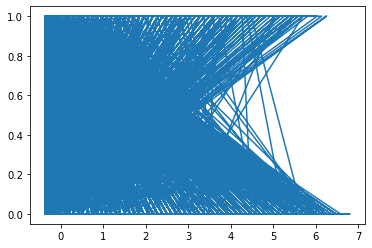

In [29]:
plt.plot(scaled_df['deposits'], y_train)

In [30]:
#sns.pairplot(new_data)

# Automated EDA

In [34]:
!pip install dtale

In [35]:
import dtale
dtale.show(new_data)

C:\Users\000PHC744\Anaconda3\lib\site-packages\seaborn\matrix.py:305: UserWarning:

Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.

C:\Users\000PHC744\Anaconda3\lib\site-packages\seaborn\matrix.py:305: UserWarning:

Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.

2022-10-02 23:22:51,205 - WARNING  - findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.


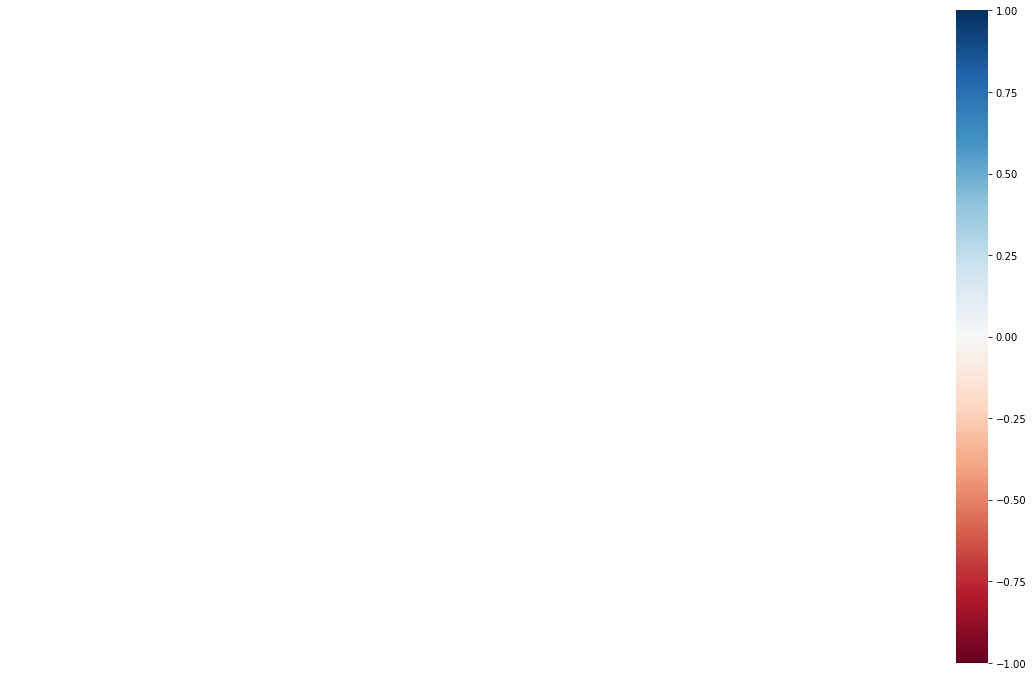

In [36]:
dtale.show(scaled_df)

In [42]:
# using Pandas-profiling
!pip install -U pandas-profiling

In [50]:
# using SweetViz library
!pip install sweetviz

In [51]:
import sweetviz as sv
report = sv.analyze(new_data)
report.show_html('customer_stats.html')

                                             |                                             | [  0%]   00:00 ->…

Report customer_stats.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
